In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt
import time

In [2]:
data_path = Path("../../data")
directors = pd.read_csv(data_path/"train"/"directors.tsv", sep = '\t')
genres = pd.read_csv(data_path/"train"/"genres.tsv", sep = '\t')
titles = pd.read_csv(data_path/"train"/"titles.tsv", sep = '\t')
train_ratings = pd.read_csv(data_path/"train"/"train_ratings.csv")
writers = pd.read_csv(data_path/"train"/"writers.tsv", sep = '\t')
years = pd.read_csv(data_path/"train"/"years.tsv", sep = '\t')

## directors

In [3]:
directors.info()
directors.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5905 entries, 0 to 5904
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   item      5905 non-null   int64 
 1   director  5905 non-null   object
dtypes: int64(1), object(1)
memory usage: 92.4+ KB


,item,director
0,1237,nm0000005
1,5147,nm0000005
2,7327,nm0000005
3,2068,nm0000005
4,7396,nm0000005


In [4]:
directors['item'].nunique()

5503

In [5]:
directors['director'].nunique()

1340

In [31]:
directors['director'].value_counts()

director
nm0000095    44
nm0000033    33
nm0000142    31
nm0000229    29
nm0000217    26
             ..
nm1134029     2
nm1160962     2
nm1170855     2
nm1201875     2
nm1012501     2
Name: count, Length: 1340, dtype: int64

- 모든 감독이 최소 2개, 최대 44개의 작품에 참여했다.

## genres

In [6]:
genres.info()
genres.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15933 entries, 0 to 15932
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   item    15933 non-null  int64 
 1   genre   15933 non-null  object
dtypes: int64(1), object(1)
memory usage: 249.1+ KB


,item,genre
0,318,Crime
1,318,Drama
2,2571,Action
3,2571,Sci-Fi
4,2571,Thriller


In [7]:
genres['item'].nunique()

6807

In [8]:
genres['genre'].nunique()

18

In [33]:
genres['genre'].value_counts()

genre
Drama          3490
Comedy         2408
Thriller       1466
Romance        1251
Action         1246
Crime           924
Adventure       891
Sci-Fi          653
Horror          602
Fantasy         557
Mystery         471
Children        432
Animation       355
War             346
Documentary     323
Musical         282
Western         139
Film-Noir        97
Name: count, dtype: int64

## titles

In [9]:
titles.info()
titles.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6807 entries, 0 to 6806
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   item    6807 non-null   int64 
 1   title   6807 non-null   object
dtypes: int64(1), object(1)
memory usage: 106.5+ KB


,item,title
0,318,"Shawshank Redemption, The (1994)"
1,2571,"Matrix, The (1999)"
2,2959,Fight Club (1999)
3,296,Pulp Fiction (1994)
4,356,Forrest Gump (1994)


In [34]:
titles['title'].nunique()

6806

In [37]:
duplicate_titles = titles[titles.duplicated(subset=['title'], keep=False)]
duplicate_titles

,item,title
349,34048,War of the Worlds (2005)
1926,64997,War of the Worlds (2005)


title이 하나 없다는게 이걸 말한거 같음
- title데이터 행 개수 6807인데 nunique하니까 6806이라..
- 그래서 중복 행을 찾아본 것

## train_ratings

In [59]:
train_ratings.info()
train_ratings.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5152639 entries, 0 to 5152638
Data columns (total 7 columns):
 #   Column          Dtype         
---  ------          -----         
 0   user            int64         
 1   item            int64         
 2   time            int64         
 3   converted_time  datetime64[ns]
 4   watch_year      int32         
 5   year            int64         
 6   year_diff       int64         
dtypes: datetime64[ns](1), int32(1), int64(5)
memory usage: 255.5 MB


,user,item,time,converted_time,watch_year,year,year_diff
0,11,4643,1230782529,2009-01-01 04:02:09,2009,2001,8
1,11,170,1230782534,2009-01-01 04:02:14,2009,1995,14
2,11,531,1230782539,2009-01-01 04:02:19,2009,1993,16
3,11,616,1230782542,2009-01-01 04:02:22,2009,1970,39
4,11,2140,1230782563,2009-01-01 04:02:43,2009,1982,27


In [56]:
train_ratings['user'].value_counts()

user
8405      2906
54465     1980
24219     1841
32514     1830
91349     1791
          ... 
11211       32
128756      28
105578      22
68606       19
53188       16
Name: count, Length: 31360, dtype: int64

- 유저들은 최소 16, 최대 2906개의 영화 시청

In [64]:
# 8405번 user의 데이터 필터링
user8405 = train_ratings[train_ratings['user'] == 8405]
user8405

,user,item,time,converted_time,watch_year,year,year_diff
315017,8405,1252,1160462492,2006-10-10 06:41:32,2006,1974,32
315018,8405,1278,1160462504,2006-10-10 06:41:44,2006,1974,32
315019,8405,2599,1160462620,2006-10-10 06:43:40,2006,1999,7
315020,8405,3408,1160462658,2006-10-10 06:44:18,2006,2000,6
315021,8405,2268,1160462698,2006-10-10 06:44:58,2006,1992,14
...,...,...,...,...,...,...,...
317918,8405,1967,1336360450,2012-05-07 03:14:10,2012,1986,26
317919,8405,2966,1344146938,2012-08-05 06:08:58,2012,1999,13
317920,8405,356,1344220422,2012-08-06 02:33:42,2012,1994,18
317921,8405,69685,1359355760,2013-01-28 06:49:20,2013,2002,11


/tmp/ipykernel_371659/1111850032.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user8405["month"] = user8405["converted_time"].dt.to_period("M")


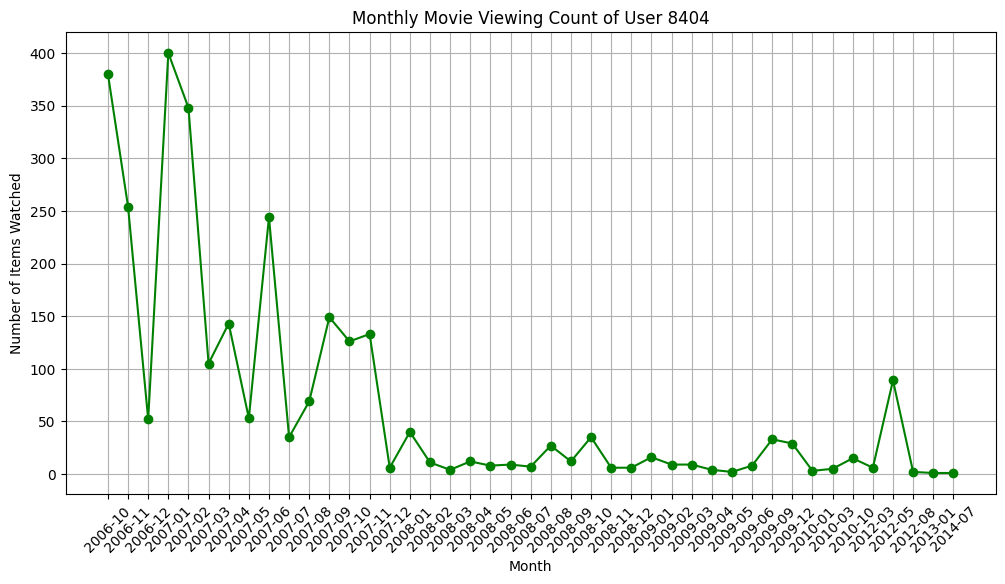

In [66]:
user8405["month"] = user8405["converted_time"].dt.to_period("M")
monthly_count = user8405.groupby("month").size().reset_index(name="item_count")

# 월 단위 시청 개수 그래프
plt.figure(figsize=(12, 6))
plt.plot(monthly_count["month"].astype(str), monthly_count["item_count"], marker='o', linestyle='-', color='g')
plt.xlabel("Month")
plt.ylabel("Number of Items Watched")
plt.title("Monthly Movie Viewing Count of User 8404")
plt.xticks(rotation=45)
plt.grid()
plt.show()

- 예상: 10년 이상 매월 25편 정도 시청
- 결과: 2006년 10월 ~ 2014년 7월까지 약 8년, 
    - 영화만 보는 직업이라고 가정해도 하루에 5편 정도 본다고 하면 월 최대 150편 시청 가능
    - 그러나 150 넘는 달이 5번 정도 됨

/tmp/ipykernel_371659/4139254864.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user8405["date"] = user8405["converted_time"].dt.to_period("D")


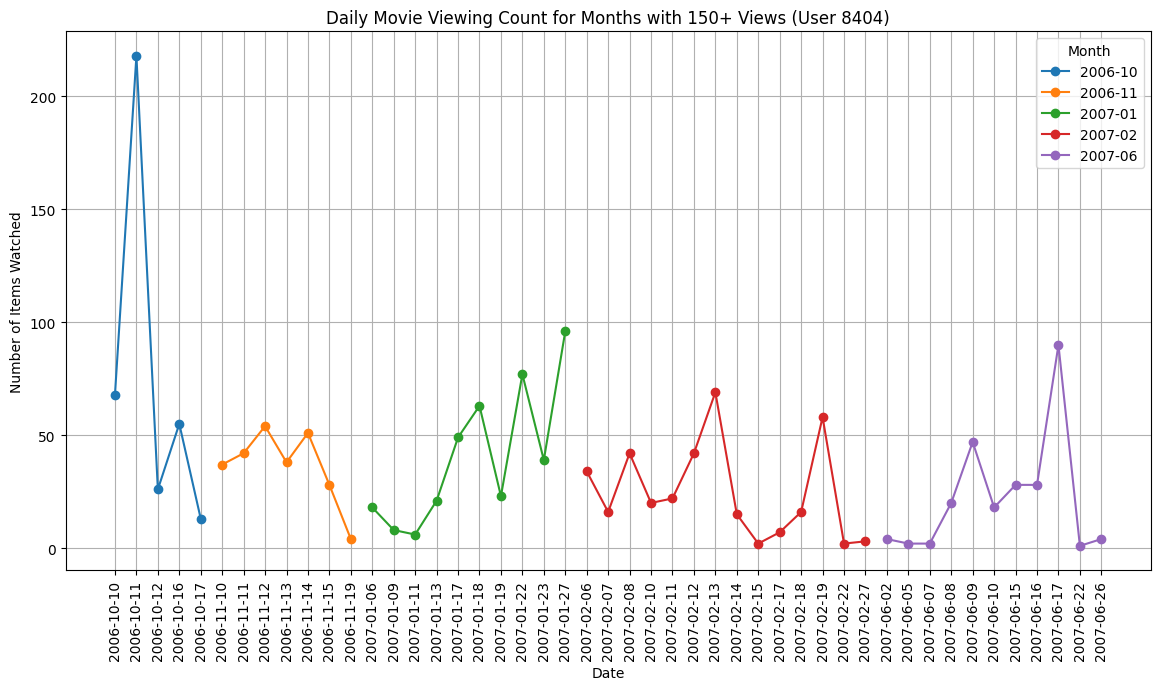

In [73]:
user8405["date"] = user8405["converted_time"].dt.to_period("D")

# 월별 시청 개수가 150 이상인 달 필터링
high_activity_months = monthly_count[monthly_count["item_count"] >= 150]["month"]

# 해당 월들의 일별 시청 기록 추출
high_activity_data = user8405[user8405["month"].isin(high_activity_months)]
daily_high_activity_count = high_activity_data.groupby(["month", "date"]).size().reset_index(name="item_count")

# 'date' 열을 문자열로 변환
daily_high_activity_count["date"] = daily_high_activity_count["date"].astype(str)

# 그래프 그리기
plt.figure(figsize=(14, 7))
for month in high_activity_months:
    month_data = daily_high_activity_count[daily_high_activity_count["month"] == month]
    plt.plot(month_data["date"], month_data["item_count"], marker='o', linestyle='-', label=str(month))

plt.xlabel("Date")
plt.ylabel("Number of Items Watched")
plt.title("Daily Movie Viewing Count for Months with 150+ Views (User 8404)")
plt.xticks(rotation=90)
plt.legend(title="Month")
plt.grid()
plt.show()

갑자기 멘붕옴.. 시청 시간 생각해서 막 나누다가 
time이 시청 시각으로 간주할 뿐이지 원래 의미는 평점을 남긴 시각이기 때문에 하루에 200편 이상 평점을 남기는 것도 가능하다는 것을 잊고 있었음
=> 이상치 처리하지 않는 것이 맞다고 생각함.
- 여기서 이상치를 처리했을 때의 문제점은 이상치 처리를 위해 train_ratings의 행 삭제 시, 이미 시청한 영화가 시청하지 않는 걸로 판단하고 추천하는 문제가 생길 수 있음. 
- 영화 평론이 아닌, 평점을 매기는 것이기 때문에 하루에 200건이 넘게도 가능하겠다는 결론에 도달함 

In [71]:
daily_high_activity_count

,month,date,item_count
0,2006-10,2006-10-10,68
1,2006-10,2006-10-11,218
2,2006-10,2006-10-12,26
3,2006-10,2006-10-16,55
4,2006-10,2006-10-17,13
5,2006-11,2006-11-10,37
6,2006-11,2006-11-11,42
7,2006-11,2006-11-12,54
8,2006-11,2006-11-13,38
9,2006-11,2006-11-14,51


train_ratings 데이터 time(초 단위 타임스탬프) -> converted_time

In [38]:
train_ratings['converted_time'] = pd.to_datetime(train_ratings['time'], unit='s')

In [39]:
train_ratings.head()

,user,item,time,converted_time,watch_year,year,year_diff
0,11,4643,1230782529,2009-01-01 04:02:09,2009,2001,8
1,11,170,1230782534,2009-01-01 04:02:14,2009,1995,14
2,11,531,1230782539,2009-01-01 04:02:19,2009,1993,16
3,11,616,1230782542,2009-01-01 04:02:22,2009,1970,39
4,11,2140,1230782563,2009-01-01 04:02:43,2009,1982,27


## writers

In [11]:
writers.info()
writers.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11306 entries, 0 to 11305
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   item    11306 non-null  int64 
 1   writer  11306 non-null  object
dtypes: int64(1), object(1)
memory usage: 176.8+ KB


,item,writer
0,1237,nm0000005
1,5147,nm0000005
2,7327,nm0000005
3,2068,nm0000005
4,7396,nm0000005


In [41]:
writers['writer'].nunique()

2989

In [40]:
writers['writer'].value_counts()

writer
nm0000095    47
nm0000636    35
nm0000175    32
nm0372942    30
nm0000108    29
             ..
nm2648685     2
nm2744748     2
nm2774833     2
nm0494435     2
nm0489995     2
Name: count, Length: 2989, dtype: int64

- 작가 또한 모두 최소 2작품, 최대 47작품 참여

## years

In [12]:
# 영화 개봉년도
years.info() 
years.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6799 entries, 0 to 6798
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   item    6799 non-null   int64
 1   year    6799 non-null   int64
dtypes: int64(2)
memory usage: 106.4 KB


,item,year
0,1348,1922
1,44587,1922
2,4768,1922
3,8235,1923
4,8609,1923


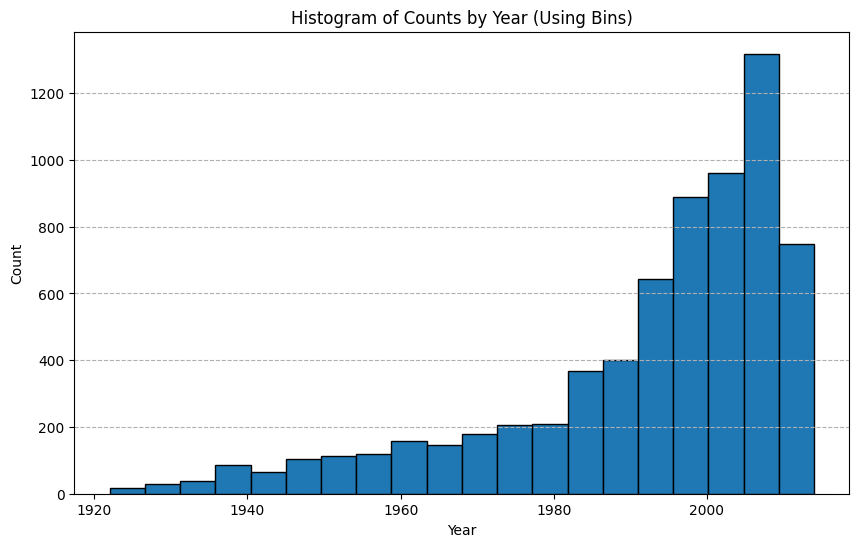

In [74]:
# 개봉연도별 영화개수
plt.figure(figsize=(10, 6))
plt.hist(years['year'], bins=20, edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Histogram of Counts by Year (Using Bins)')
plt.grid(axis='y', linestyle='--')
plt.show()

결측치  없음

## +@

In [14]:
active_user_ids = train_ratings.value_counts('user').index[:10]
popular_movie_ids = train_ratings.value_counts('item').index[:10]

In [15]:
active_user_ids

Index([8405, 54465, 24219, 32514, 91349, 131904, 34576, 99754, 31122, 118754], dtype='int64', name='user')

In [16]:
director_df = pd.merge(train_ratings, directors, on=['item'])
director_id = director_df.value_counts('director').index[:10]

side_df = []
for director in director_id:
    side_df.append(director_df.loc[director_df['director'] == director])

director_top = pd.concat(side_df)

print ("Number of all unique director ids: ", director_df['director'].nunique())
print ("\ntop 10 director ids: \n", director_id)
print ("\nsample of top 10 user-director data: \n", director_top.sample(5))
print ("\nshape of the data: ", director_top.shape)

Number of all unique director ids:  1340

top 10 director ids: 
 Index(['nm0000229', 'nm0000233', 'nm0634240', 'nm0000709', 'nm0001392',
       'nm0000217', 'nm0001054', 'nm0000116', 'nm0000399', 'nm0000631'],
      dtype='object', name='director')

sample of top 10 user-director data: 
            user   item        time   director
4481009  114270   3578  1229410286  nm0000631
2663289   67629  41997  1138041036  nm0000229
3471933   88122    380  1136792740  nm0000116
3358357   85356    296  1158360672  nm0000233
1077006   27116   3578  1334094868  nm0000631

shape of the data:  (672019, 4)


In [17]:
writer_df = pd.merge(train_ratings, writers, on=['item'])
writer_id = writer_df.value_counts('writer').index[:10]

side_df = []
for writer in writer_id:
    side_df.append(writer_df.loc[writer_df['writer'] == writer])

writer_top = pd.concat(side_df)

print ("Number of all unique writer ids: ", writer_df['writer'].nunique())
print ("\ntop 10 writer ids: \n", writer_id)
print ("\nsample of top 10 user-writer data: \n", writer_top.sample(5))
print ("\nshape of the data: ", writer_top.shape)

Number of all unique writer ids:  2989

top 10 writer ids: 
 Index(['nm0000184', 'nm0000233', 'nm0634240', 'nm0001392', 'nm0909638',
       'nm0004056', 'nm0744429', 'nm0101991', 'nm0254645', 'nm0000175'],
      dtype='object', name='writer')

sample of top 10 user-writer data: 
           user   item        time     writer
5018039  60962  60069  1335387063  nm0004056
3344855  40521    260  1147903744  nm0000184
3346951  40532   4226  1281282254  nm0634240
6704409  81721    296  1225192227  nm0000233
1720905  20882   6539  1113989612  nm0744429

shape of the data:  (651286, 4)


In [18]:
title_df = pd.merge(train_ratings, titles, on=['item'])
title_id = title_df.value_counts('title').index[:10]


side_df = []
for title in title_id:
    side_df.append(title_df.loc[title_df['title'] == title])

title_top = pd.concat(side_df)

print ("Number of all unique movie titles: ", title_df['title'].nunique())
print ("\ntop 10 movie titles: \n", title_id)
print ("\nsample of top 10 user-title data: \n", title_top.sample(5))
print ("\nshape of the data: ", title_top.shape)

Number of all unique movie titles:  6806

top 10 movie titles: 
 Index(['Matrix, The (1999)', 'Fight Club (1999)', 'Pulp Fiction (1994)',
       'Shawshank Redemption, The (1994)', 'Forrest Gump (1994)',
       'Lord of the Rings: The Fellowship of the Ring, The (2001)',
       'Lord of the Rings: The Return of the King, The (2003)',
       'Lord of the Rings: The Two Towers, The (2002)',
       'Silence of the Lambs, The (1991)', 'American Beauty (1999)'],
      dtype='object', name='title')

sample of top 10 user-title data: 
            user  item        time  \
4010127  107121  7153  1152742271   
3377902   89952   296  1268856074   
2094720   55523  2571  1135964464   
1364526   35985  7153  1206950763   
32785       872  2571  1290859486   

                                                     title  
4010127  Lord of the Rings: The Return of the King, The...  
3377902                                Pulp Fiction (1994)  
2094720                                 Matrix, The (1999) 

In [19]:
year_df = pd.merge(train_ratings, years, on=['item'])
year_id = year_df.value_counts('year').index[:10]

side_df = []
for year in year_id:
    side_df.append(year_df.loc[year_df['year'] == year])

year_top = pd.concat(side_df)

print ("All unique years: \n", np.sort(year_df['year'].unique()))
print ("\nNumber of all unique years: ", year_df['year'].nunique())
print ("\ntop 10 years: \n", year_id)
print ("\nsample of top 10 user-year data: \n", year_top.sample(5))
print ("\nshape of the data: ", year_top.shape)

All unique years: 
 [1922 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932 1933 1934 1935
 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947 1948 1949
 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963
 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977
 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991
 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010 2011 2012 2013 2014]

Number of all unique years:  93

top 10 years: 
 Index([2004, 1999, 2001, 2002, 2006, 2003, 2000, 2005, 1995, 2007], dtype='int64', name='year')

sample of top 10 user-year data: 
           user   item        time  year
666491   17818   4344  1225291358  2001
1540688  40802   3578  1378238129  2000
3070723  81939     17  1226074743  1995
1291236  34262  54997  1402804252  2007
3053875  81413   4638  1253412865  2001

shape of the data:  (2173226, 4)


In [20]:
genre_df = pd.merge(train_ratings, genres, on=['item'])

genre_top = genre_df

print ("All unique genres: \n", np.sort(genre_df['genre'].unique()))
print ("\nNumber of all unique genres: ", genre_df['genre'].nunique())
print ("\nsample of user-genre data: \n", genre_top.sample(5))
print ("\nshape of the data: ", genre_top.shape)

All unique genres: 
 ['Action' 'Adventure' 'Animation' 'Children' 'Comedy' 'Crime'
 'Documentary' 'Drama' 'Fantasy' 'Film-Noir' 'Horror' 'Musical' 'Mystery'
 'Romance' 'Sci-Fi' 'Thriller' 'War' 'Western']

Number of all unique genres:  18

sample of user-genre data: 
             user   item        time      genre
606103      5613    457  1153753598   Thriller
6411260    62083    588  1361066133     Comedy
7264138    70759   3176  1228073376      Drama
12570906  122735  88129  1427022373  Film-Noir
1425887    13909  56367  1239484810      Drama

shape of the data:  (14126324, 4)


<function matplotlib.pyplot.show(close=None, block=None)>

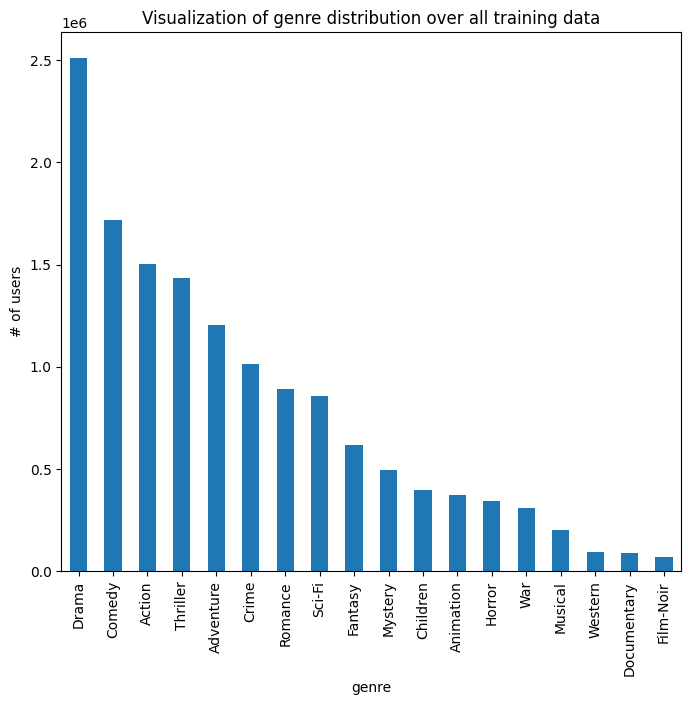

In [21]:
genre_top['genre'].value_counts().plot(kind = 'bar', figsize = (8,7))
plt.xlabel('genre')
plt.ylabel('# of users')
plt.title('Visualization of genre distribution over all training data')
plt.show

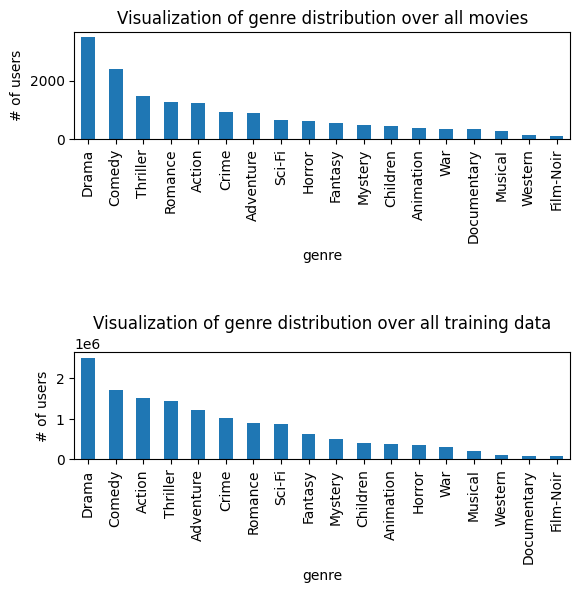

In [22]:
plt.subplot(2,1,1)
genres['genre'].value_counts().plot(kind = 'bar')
plt.xlabel('genre')
plt.ylabel('# of users')
plt.title('Visualization of genre distribution over all movies')

plt.subplot(2,1,2)
genre_top['genre'].value_counts().plot(kind = 'bar')
plt.xlabel('genre')
plt.ylabel('# of users')
plt.title('Visualization of genre distribution over all training data')

plt.subplots_adjust(hspace=2.0, top=1.0)

<Axes: xlabel='genre'>

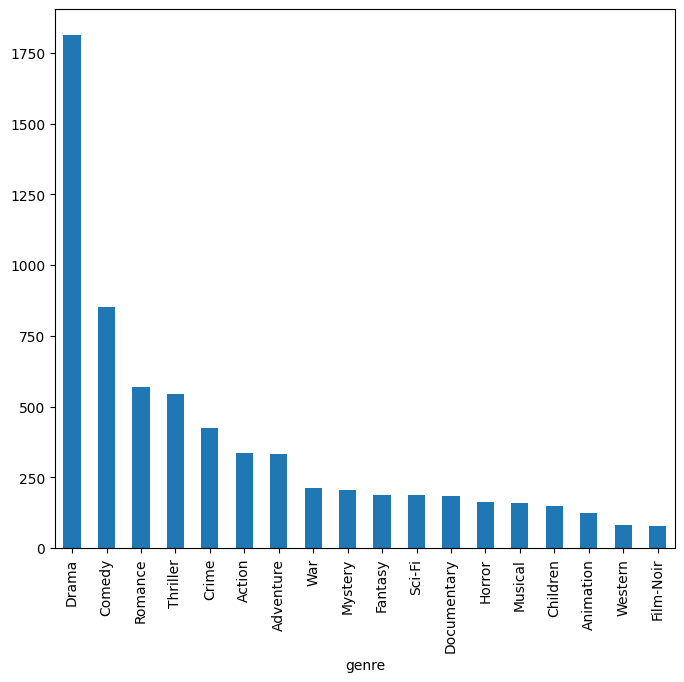

In [23]:
user_id = active_user_ids[0] # specific user id
genre_user = genre_top[genre_top['user'] == user_id]

genre_user['genre'].value_counts().plot(kind = 'bar', figsize = (8,7))

## feature

train_ratings 데이터 time(초 단위 타임스탬프) -> converted_time

In [24]:
train_ratings['converted_time'] = pd.to_datetime(train_ratings['time'], unit='s')

In [25]:
train_ratings.head()

,user,item,time,converted_time
0,11,4643,1230782529,2009-01-01 04:02:09
1,11,170,1230782534,2009-01-01 04:02:14
2,11,531,1230782539,2009-01-01 04:02:19
3,11,616,1230782542,2009-01-01 04:02:22
4,11,2140,1230782563,2009-01-01 04:02:43


시청년도 - 개봉년도

In [26]:
train_ratings['watch_year'] = train_ratings['converted_time'].dt.year

In [27]:
train_ratings = pd.merge(train_ratings, years, on=['item'])

In [28]:
train_ratings.head()

,user,item,time,converted_time,watch_year,year
0,11,4643,1230782529,2009-01-01 04:02:09,2009,2001
1,11,170,1230782534,2009-01-01 04:02:14,2009,1995
2,11,531,1230782539,2009-01-01 04:02:19,2009,1993
3,11,616,1230782542,2009-01-01 04:02:22,2009,1970
4,11,2140,1230782563,2009-01-01 04:02:43,2009,1982


In [29]:
train_ratings['year_diff'] = train_ratings['watch_year'] - train_ratings['year']

/tmp/ipykernel_371659/2438137801.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  converted_df['time'] = old_df['time'].replace([old_time], new_time) # replace the time column


Text(0.5, 1.0, 'Statistics of user activity')

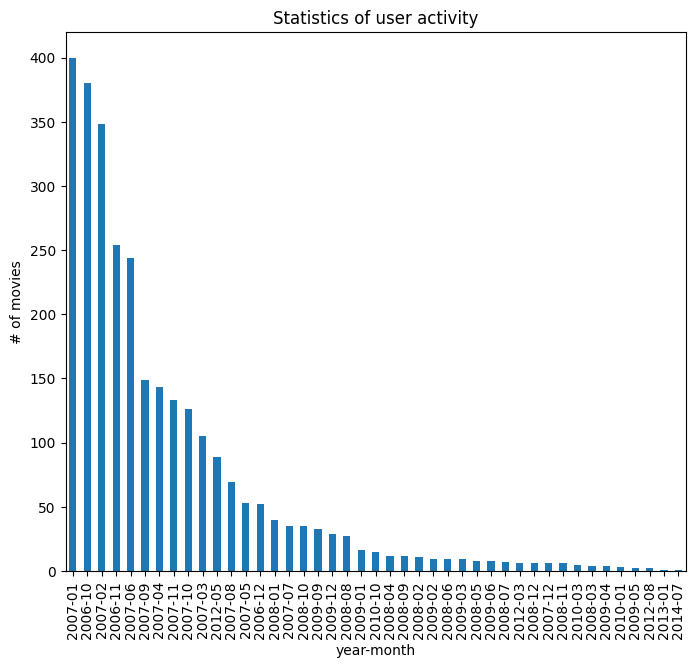

In [30]:
old_df = train_ratings[train_ratings['user'] == active_user_ids[0]] # Specific user id
converted_df = old_df

for old_time in old_df['time']:
    new_time = time.strftime('%Y-%m', time.localtime(old_time))
    converted_df['time'] = old_df['time'].replace([old_time], new_time) # replace the time column

converted_df['time'].value_counts().plot(kind = 'bar', figsize = (8,7))
plt.xlabel('year-month')
plt.ylabel('# of movies')
plt.title('Statistics of user activity')

# 생각해볼것, 추가해볼것

써보면 좋을 것 같은 모델

- BERT4Rec

시간 정보 파생변수로 넣어서 
- 피쳐 : 시청년도-개봉년도
- DeepFM
- 
- 연휴 각 나라마다 다름(어느나라 사람이 평점 내렸는지)

연휴 기간 확인
- 당시 개봉작
- 평점 내린 시간

## user 별 선호 genres

In [42]:
user_genres = pd.merge(train_ratings, genres, on='item')

In [43]:
user_genres.head()

,user,item,time,converted_time,watch_year,year,year_diff,genre
0,11,4643,1230782529,2009-01-01 04:02:09,2009,2001,8,Action
1,11,4643,1230782529,2009-01-01 04:02:09,2009,2001,8,Adventure
2,11,4643,1230782529,2009-01-01 04:02:09,2009,2001,8,Drama
3,11,4643,1230782529,2009-01-01 04:02:09,2009,2001,8,Sci-Fi
4,11,170,1230782534,2009-01-01 04:02:14,2009,1995,14,Action


In [45]:
user_genre_count = user_genres.groupby(['user', 'genre']).size().reset_index(name='count')

In [46]:
user_genre_count.head()

,user,genre,count
0,11,Action,167
1,11,Adventure,133
2,11,Animation,50
3,11,Children,53
4,11,Comedy,99


선호 장르 하나

In [48]:
favorite_genres = user_genre_count.loc[user_genre_count.groupby('user')['count'].idxmax()]

In [50]:
favorite_genres[favorite_genres['user']==11]

,user,genre,count
14,11,Sci-Fi,176


상위 3개 장르

In [51]:
n = 3
top_n_genres = user_genre_count.groupby('user').apply(lambda x: x.nlargest(n, 'count')).reset_index(drop=True)

/tmp/ipykernel_371659/3667412443.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_n_genres = user_genre_count.groupby('user').apply(lambda x: x.nlargest(n, 'count')).reset_index(drop=True)


사용자별 선호 장르 목록

In [52]:
preferred_genres = user_genre_count[user_genre_count['count'] >= 5]

선호 장르 비율

In [54]:
# 사용자별 장르 시청 횟수 합계 계산
total_count = user_genre_count.groupby('user')['count'].sum().reset_index(name='total_count')

# 비율 계산을 위해 합치기
user_genre_count = pd.merge(user_genre_count, total_count, on='user')
user_genre_count['ratio'] = user_genre_count['count'] / user_genre_count['total_count']

# 비율이 높은 순으로 정렬
user_genre_count = user_genre_count.sort_values(by=['user', 'ratio'], ascending=[True, False])

In [55]:
user_genre_count

,user,genre,count,total_count,ratio
14,11,Sci-Fi,176,1178,0.149406
0,11,Action,167,1178,0.141766
1,11,Adventure,133,1178,0.112903
15,11,Thriller,130,1178,0.110357
7,11,Drama,112,1178,0.095076
...,...,...,...,...,...
521195,138493,Horror,22,939,0.023429
521201,138493,War,10,939,0.010650
521202,138493,Western,5,939,0.005325
521191,138493,Documentary,2,939,0.002130
